<a href="https://colab.research.google.com/github/eolmez91/Mushroom-Classification/blob/master/dead_or_alive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Veri kümesinin yüklenmesi, kütüphanlerin çağrılması ve veri kümesinin kontrolü.

In [1]:
# İlk olarak veri kümesinin bulunduğu drive hesabını colab'e bağlıyoruz.
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# Kullanacağımız kütüphaneleri çağırıyoruz.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Veri kümesinin bulunduğu klasöre gidiyoruz
%cd "/content/drive/My Drive/BOOTCAMP/Mushroom Classification"

/content/drive/My Drive/BOOTCAMP/Mushroom Classification


In [0]:
# Klasördeki dosyaları kontrol ediyoruz
!ls

'dead or alive.ipynb'   mushrooms.csv


In [0]:
# Veri kümesini, mdata isimli değişkene atayalım
mdata = pd.read_csv('mushrooms.csv')

In [9]:
# Verimizi kontrol edelim
mdata.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [0]:
mdata.shape 

(8124, 23)

In [0]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [0]:
mdata.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


## Mantarları ""***şapka rengi***" ve "***koku***" özelliklerine göre analiz edelim.

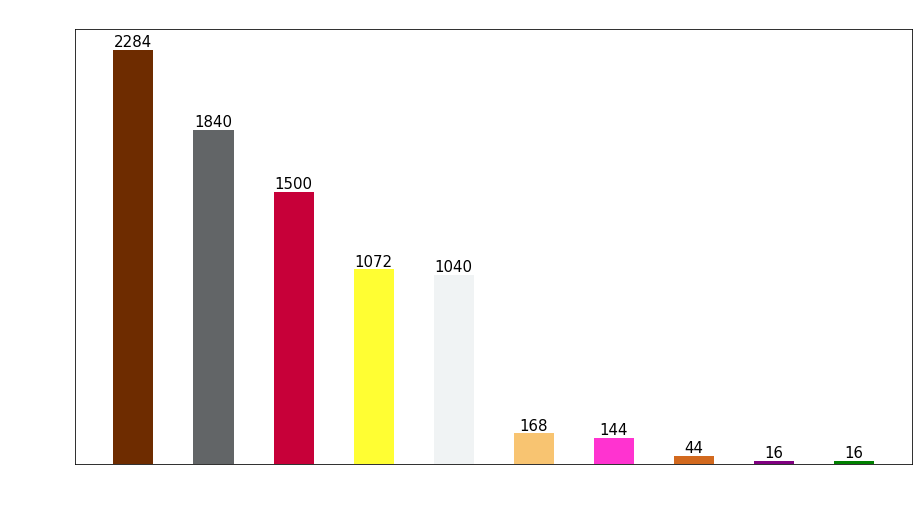

In [53]:
#Her bir renkten kaçar tane mantar olduğuna bakalım.
cap_colors = mdata['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Sayısal değerlerini gösterir
cap_colors.axes #Renk etiketlerini yazdırır
cap_color_labels = cap_colors.axes[0].tolist() #Renk dizinindekileri bir listeye atar

#Çizdirilecek grafiğin ayarlanması
ind = np.arange(10) #X ekseninin uzunluğu 
width = 0.5 #Sütünların genişliği
colors = ['#6E2C00','#626567','#C70039','#FFFE33','#F0F3F4','#F8C471','#FF33D0','#D2691E','#800080','#008000'] #Renk kodları

fig, ax = plt.subplots(figsize=(15,8))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Grafik üzerinde gözükecek yazıların ayarlanması
ax.set_xlabel("Cap Color",fontsize=20, color='w')
ax.set_ylabel('Quantity',fontsize=20, color='w')
ax.set_title('Mushroom Cap Color Quantity',fontsize=22, color='w')
ax.set_xticks(ind) 
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'))
ax.tick_params(axis='both', labelsize=15, colors='w')

#Her sütun rengi için mantar sayısını ekleme
def autolabel(rects,fontsize=15):
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)

plt.show()

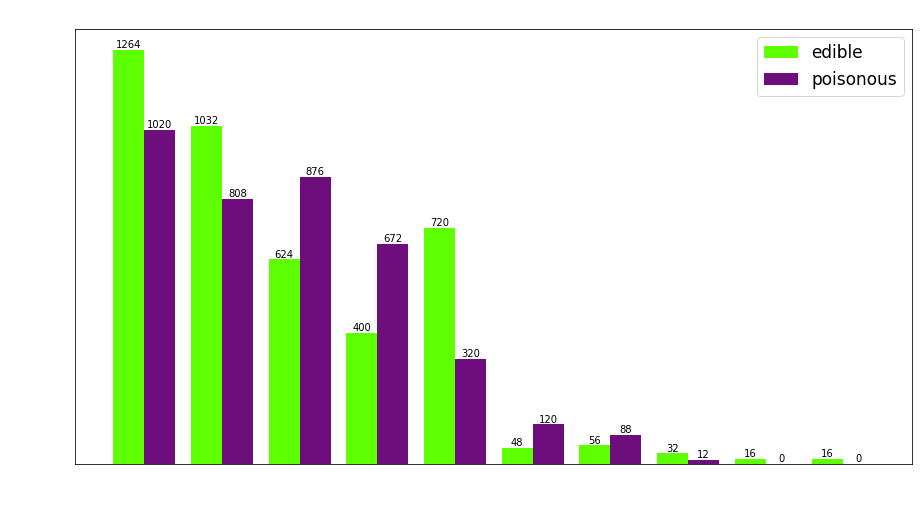

In [46]:
#Her bir renkte ne kadar zehirli ne kadar yenilebilir mantar olduğuna bakalım
edible_cc = []    #Yenilebilirler şapka rengi
poisonous_cc = [] #Zehirliler şapka rengi 
#Oluşturduğumuz listelere renklere göre ayırarak atayalım
for capColor in cap_color_labels:
    size = len(mdata[mdata['cap-color'] == capColor].index)
    edibles = len(mdata[(mdata['cap-color'] == capColor) & (mdata['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#Çizdirelicek grafiğin ayarlanması
width = 0.40
fig, ax = plt.subplots(figsize=(15,8))
edible_bars = ax.bar(ind, edible_cc , width, color='#5EFF00')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#6E0E7D')

#Grafik üzerinde fontun ayarlanması
ax.set_xlabel("Cap Color",fontsize=20, color='w')
ax.set_ylabel('Quantity',fontsize=20, color='w')
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22, color='w')
ax.set_xticks(ind + width / 2) #X ekseni üzerinde konumlandırma
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'))
ax.tick_params(axis='both', labelsize=15, colors='w')

ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17) #Yenilebilir ve zehirli olanları rengini belirtme
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()

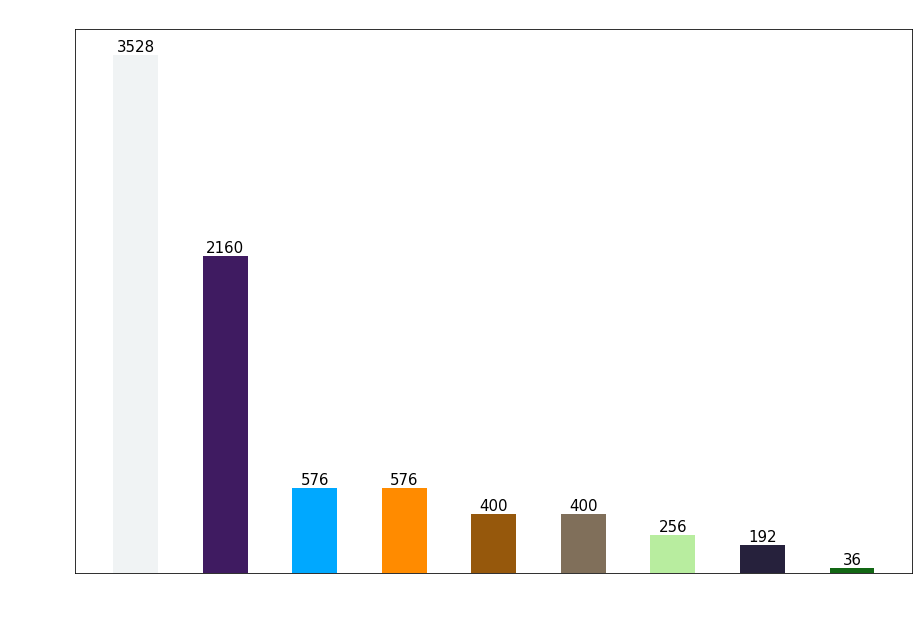

In [48]:
#Şapka rengi için yaptığımız şekilde burada da aynılarını yapıyoruz
odors = mdata['odor'].value_counts()
odor_height = odors.values.tolist() 
odor_labels = odors.axes[0].tolist()


width = 0.5 
ind = np.arange(9)  
colors = ['#F0F3F4','#3F1B61','#00A8FF','#FF8B00','#96580C','#806F5A','#B8ED9F','#26213C','#126714']

fig, ax = plt.subplots(figsize=(15,10))
odor_bars = ax.bar(ind, odor_height , width, color=colors)

#Fontun ayarlanması
ax.set_xlabel("Odor",fontsize=20, color='w')
ax.set_ylabel('Quantity',fontsize=20, color='w')
ax.set_title('Mushroom Odor and Quantity',fontsize=22, color='w')
ax.set_xticks(ind) 
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'))
ax.tick_params(axis='both', labelsize='15', colors='w')

autolabel(odor_bars)        
plt.show() 

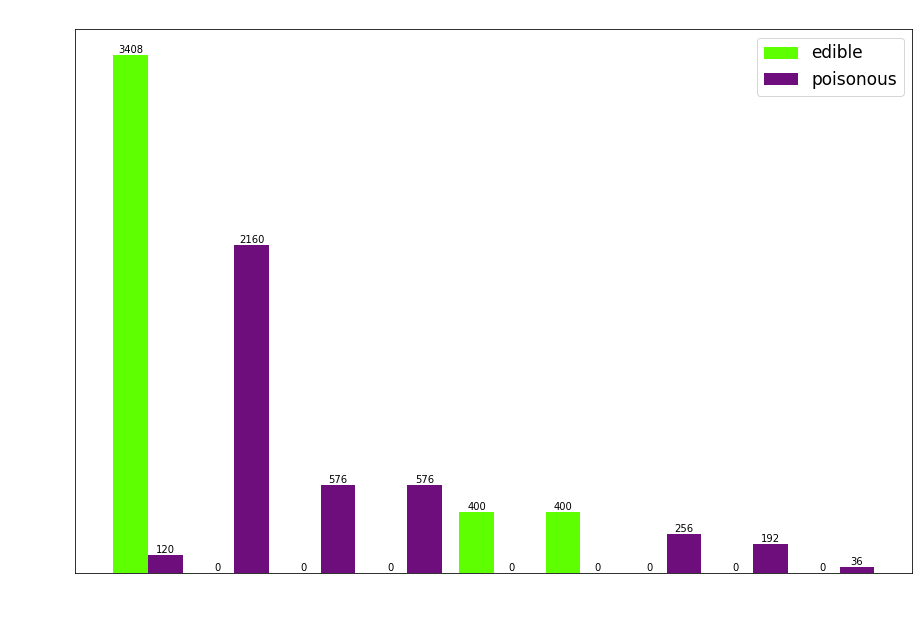

In [50]:
edible_od = []    #Yenilebilir koku listesi
poisonous_od = [] #Zehirli koku listesi
for odor in odor_labels:
    size = len(mdata[mdata['odor'] == odor].index)
    edibles = len(mdata[(mdata['odor'] == odor) & (mdata['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
#Grafiğin ayarlanması
width = 0.40
fig, ax = plt.subplots(figsize=(15,10))
edible_bars = ax.bar(ind, edible_od , width, color='#5EFF00')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='#6E0E7D')

#Yazıların ayarlanması
ax.set_xlabel("Odor",fontsize=20, color='w')
ax.set_ylabel('Quantity',fontsize=20, color='w')
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22, color='w')
ax.set_xticks(ind + width / 2) 
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'))
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
ax.tick_params(axis='both', labelsize=15, colors='w')
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()

## Verimizi eğitime hazırlama.

In [0]:
#Datamızda ki veriler harfolduğundan bunları sayılara çevirelim
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in mdata.columns:
    mdata[col] = le.fit_transform(mdata[col])
    
mdata.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [0]:
# Şimdi datamızda ki unique etiketleri ve özellikleri ayıralım

X = mdata.iloc[:, 1:23]
y = mdata['class']

In [0]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [0]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [0]:
# Şimdi test ve train datalarımızı oluşturuyoruz

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 5)

## Machine Learning algoritmalarının uygulanması.

In [0]:
# İlk olarak Decision Tree algoritmasını deneyelim.

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
acc_test = dt.score(X_test, y_test)
print("Test Verilerinde Başarı: ", acc_test)

Test Verilerinde Başarı:  1.0


In [0]:
acc_train = dt.score(X_train, y_train)
print("Eğitim Verilerinde Başarı: ", acc_train)

Eğitim Verilerinde Başarı:  1.0


In [0]:
from sklearn.metrics import accuracy_score

dt.fit(X_train, y_train)
DTP=dt.predict(X_test)

accuracy_score(y_test, DTP)

1.0

In [0]:
# Şimdide Random Forest üzerinde deneyelim
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
acc_test1 = rfc.score(X_test, y_test)

print ("Test Verilerinde Başarı:", acc_test1)

Test Verilerinde Başarı: 1.0


In [0]:
acc_train1 = rfc.score(X_train, y_train)

print ("Test Verilerinde Başarı:", acc_train1)

Test Verilerinde Başarı: 1.0


In [0]:
from sklearn.metrics import accuracy_score
rfc.fit(X_train, y_train)
RFCP=rfc.predict(X_test)

accuracy_score(y_test, RFCP)

1.0

In [0]:
# Son olarak Logistic Regression algoritmasını deneyelim
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
acc_test2 = rfc.score(X_test, y_test)

print ("Test Verilerinde Başarı:", acc_test2)

Test Verilerinde Başarı: 1.0


In [0]:
acc_train2 = rfc.score(X_train, y_train)

print ("Test Verilerinde Başarı:", acc_train2)

Test Verilerinde Başarı: 1.0


In [0]:
from sklearn.metrics import accuracy_score
lg.fit(X_train, y_train)
LRP=lg.predict(X_test)

accuracy_score(y_test, LRP)

0.9491386382280558